<a href="https://colab.research.google.com/github/p-kumar676/Machine_Learning/blob/main/LinearRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

**Linear Regression**

In [124]:
class Linear_Regression():
  #Initiating the hyper_parameters
  def __init__(self, lr, iterations, ):
    self.lr = lr
    self.iterations = iterations

  def fit(self, X, Y):
    self.row, self.col = X.shape
    self.w = np.zeros(self.col)
    self.b = 0
    self.X = X
    self.Y = Y
    for i in range(self.iterations):
      self.update_weights()

  def update_weights(self):
    Y_pred = self.predict(self.X)
    dw = -2/self.row*(np.dot(self.X.T, (self.Y - Y_pred)))
    dc = -2/self.row*(np.sum(self.Y- Y_pred))
    self.w = self.w - self.lr*dw
    self.b = self.b - self.lr*dc

  def predict(self, X):
    return np.dot(X, self.w) + self.b


**Using Our Model for prediction**

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

**Data Collection and preprocessing**

In [126]:
salary_data = pd.read_csv("/content/salary_data.csv")

In [127]:
salary_data.shape

(30, 2)

In [128]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [129]:
X = salary_data.drop("Salary", axis=1)
Y = salary_data["Salary"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,  random_state=42)

**Training the model**

In [130]:
our_model = Linear_Regression(0.01, 500)
our_model.fit(X_train, Y_train)

In [131]:
print("Weight: ", our_model.w[0])
print("Bias: ", our_model.b)

Weight:  9849.659981300278
Bias:  22616.423659327305


In [132]:
test_data_pred = our_model.predict(X_test)

In [133]:
print("Predicted Values: ", test_data_pred)

Predicted Values:  [117173.15947981  70879.7575677  103383.63550599  74819.62156022
  54135.33559949  59060.16559014 124067.92146672 108308.46549664
  62015.06358453  33451.04963876]


In [134]:
print("Real Values: ", Y_test.values)

Real Values:  [112635  67938 113812  83088  64445  57189 122391 109431  56957  39343]


**Visualisation**

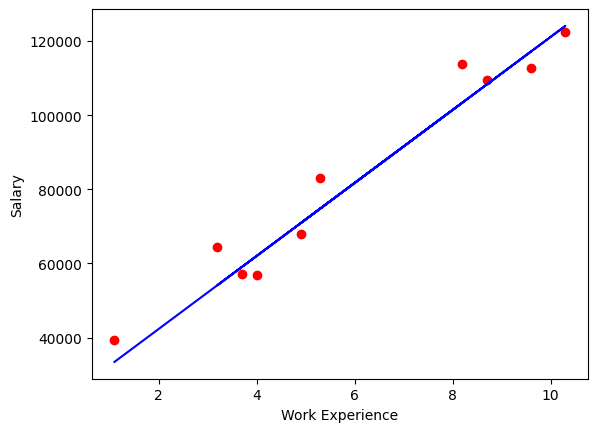

In [135]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_pred, color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.show()

In [136]:
mse = mean_squared_error(Y_test, test_data_pred)
r2 = r2_score(Y_test, test_data_pred)
print("Model Mse: ", mse)

Model Mse:  38052737.34128339


In [137]:
model = LinearRegression()
model.fit(X_train, Y_train)
inbuilt_test_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, inbuilt_test_pred)
print("Inbuilt_Model mse: ", mse)

Inbuilt_Model mse:  35301898.887134895


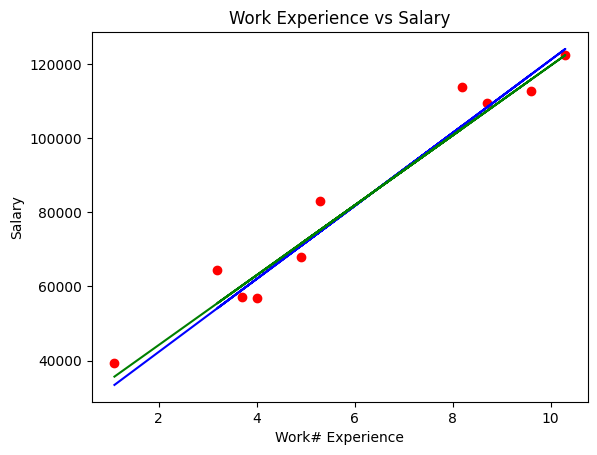

In [138]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_pred, color='blue')
plt.plot(X_test, inbuilt_test_pred, color="green")
plt.xlabel("Work# Experience")
plt.ylabel("Salary")
plt.title("Work Experience vs Salary")
plt.show()